In [1]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

In [2]:
# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [3]:
path_vpf = '/mnt/data4/Abhishek/VPF/random/'
path_cic = '/mnt/data4/Abhishek/CIC/random/'

In [4]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [5]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [6]:
vpf_data = []
full_data = []

for filename in os.listdir(path_cic):
    if filename.startswith('cic_galaxies'):
        pos = extractIndex(filename)
        cic = np.load(os.path.join(path_cic,filename))
        _,vpf = np.load(os.path.join(path_vpf,'vpf_'+filename[4:]))
        hist_cic,_ = np.histogram(cic,bins=10)
        hist_cic = hist_cic/np.sum(hist_cic)
        del cic
        hist_cic[np.where(hist_cic==0)] = 1e-10
        _temp = np.concatenate((vpf,np.log(hist_cic),f[pos]))
        del vpf
        full_data.append(_temp)

'''
for filename in os.listdir(path):
    if filename.startswith('vpf_galaxies'):
        pos = extractIndex(filename)
        _,vpf = np.load(os.path.join(path,filename))
        _temp = np.concatenate((vpf,f[pos]))
        inphase_data.append(_temp)
'''

"\nfor filename in os.listdir(path):\n    if filename.startswith('vpf_galaxies'):\n        pos = extractIndex(filename)\n        _,vpf = np.load(os.path.join(path,filename))\n        _temp = np.concatenate((vpf,f[pos]))\n        inphase_data.append(_temp)\n"

In [7]:
len(full_data)

9999

In [8]:
full_data = np.vstack((full_data))
#del inphase_data
#del data

np.random.shuffle(full_data)

In [9]:
np.save('machine_learning_data.npy',full_data)

In [18]:
X_data = full_data[:,:-5]
y_data = full_data[:,-5:]

In [60]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [20]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=2000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=False,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=True,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [21]:
reg_rf.score(X_test,y_test)

/home/ajana/anaconda3/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


-0.2088156662226837

In [22]:
print (np.mean((y_rf - y_test)**2/(y_rf**2)*100, axis=0))

[1.04895543e-03 2.33689179e-03 9.41277263e-01 8.11954933e+00
 6.32587791e-01]


In [23]:
y_rf = pd.DataFrame(y_rf)
y_test = pd.DataFrame(y_test)

In [24]:
pd.concat([y_test,y_rf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.013520,14.127082,1.055383,0.940761,0.754040,13.008996,14.043790,1.046942,1.384675,0.802406
1,13.095952,13.983772,0.969459,1.334876,0.792393,13.184518,14.066808,1.150306,0.930670,0.825799
2,13.222277,14.101452,0.993820,1.360244,0.841560,13.208406,13.994889,0.908245,1.381306,0.936742
3,13.226813,14.096627,1.041512,1.433316,0.807424,13.148635,14.052890,0.883937,1.255506,0.798562
4,13.058978,14.028864,1.030266,0.784034,1.087080,13.020233,14.028936,0.930272,0.985580,1.063379
...,...,...,...,...,...,...,...,...,...,...
995,12.981509,13.985562,0.782513,1.043570,0.905978,12.989787,14.026506,0.820823,0.928367,0.773954
996,13.147536,14.139523,1.150176,1.209371,0.716316,13.075851,14.082515,1.009688,1.162254,0.889068
997,13.229655,14.150938,0.936853,0.759468,1.093868,13.230799,14.082670,0.943638,0.957173,1.068080
998,13.075002,14.083132,0.994843,0.826535,0.863162,13.106288,14.032617,1.059453,1.301804,0.783148


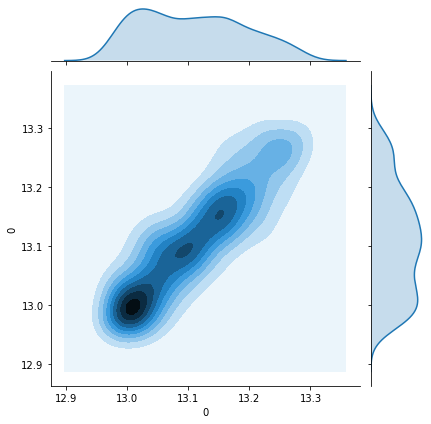

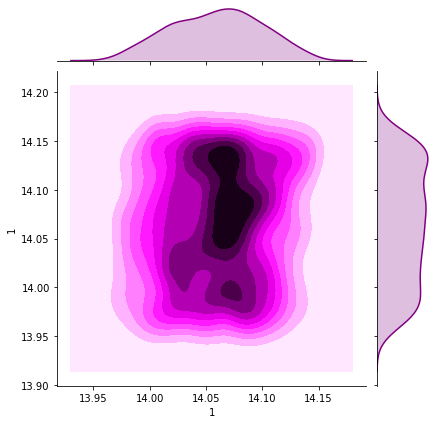

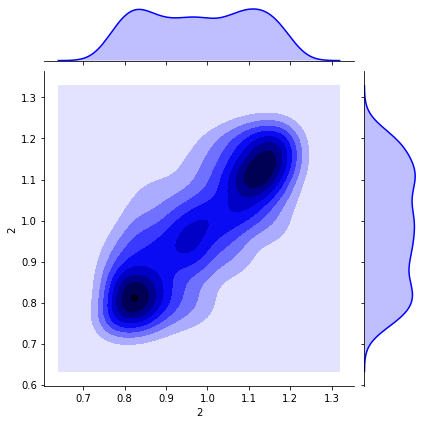

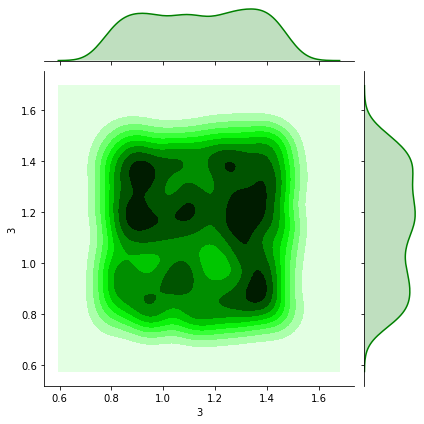

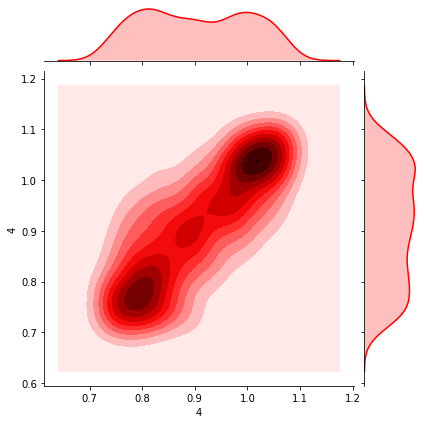

In [55]:
plot_corr(y_rf,y_test)

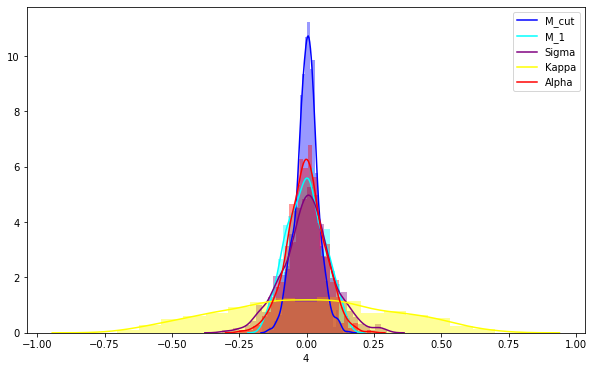

In [61]:
plot_error(y_rf,y_test,dims=(10,6))

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

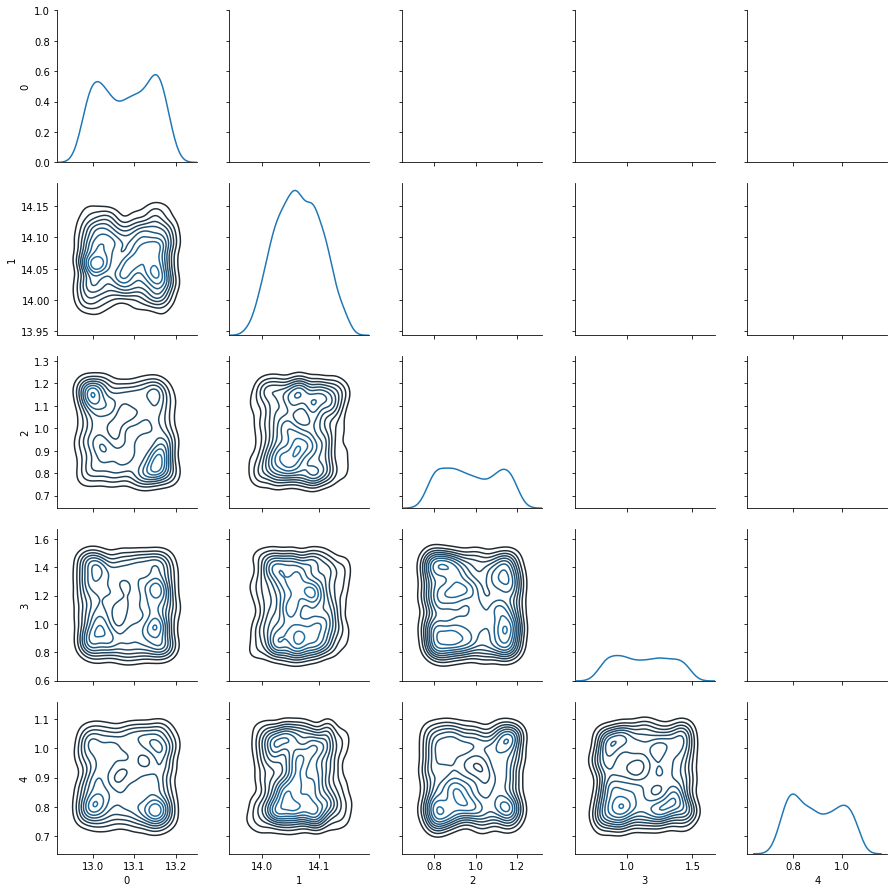

In [36]:
g = sns.PairGrid(y_rf)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

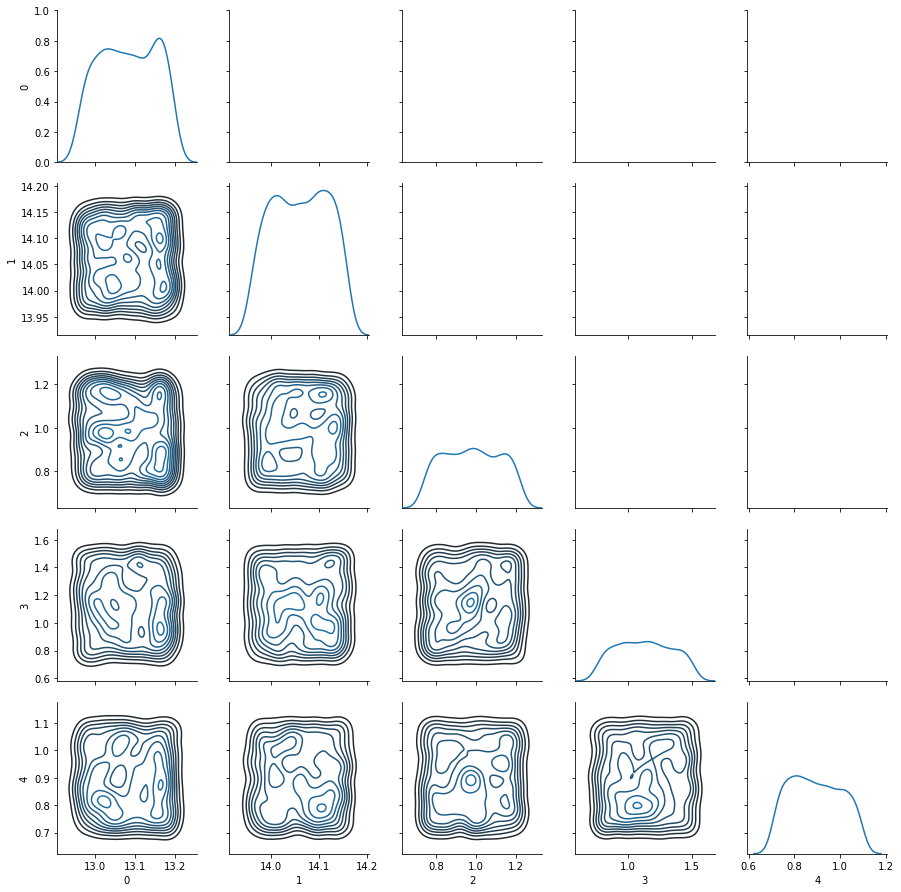

In [37]:
g = sns.PairGrid(y_test)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
plt.tight_layout

(array([ 19.,  64., 121., 143., 170., 140., 152., 116.,  53.,  22.]),
 array([13.97435501, 13.99253232, 14.01070963, 14.02888695, 14.04706426,
        14.06524157, 14.08341888, 14.1015962 , 14.11977351, 14.13795082,
        14.15612814]),
 <a list of 10 Patch objects>)

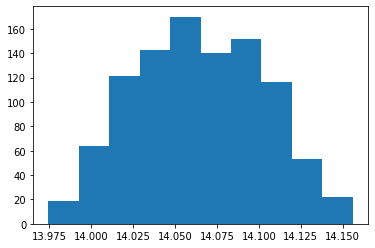

In [38]:
plt.hist(y_rf.iloc[:,1])

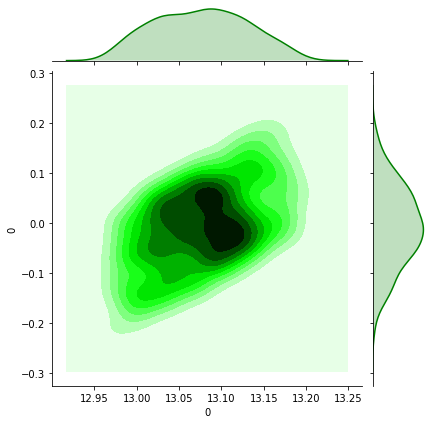

In [267]:
sns.jointplot(y_rf.iloc[:,0],y_rf.iloc[:,0]-y_test.iloc[:,0],kind = 'kde',color='green')

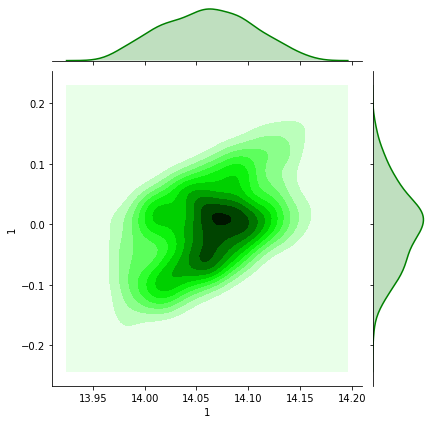

In [268]:
sns.jointplot(y_rf.iloc[:,1],y_rf.iloc[:,1]-y_test.iloc[:,1],kind = 'kde',color='green')

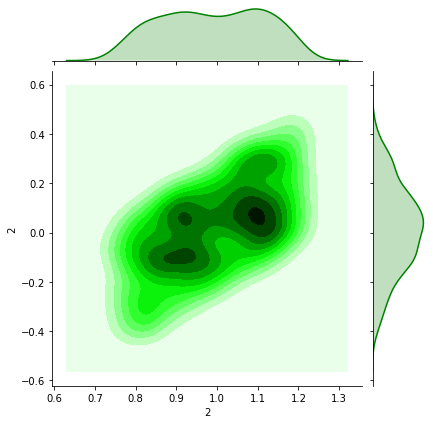

In [269]:
sns.jointplot(y_rf.iloc[:,2],y_rf.iloc[:,2]-y_test.iloc[:,2],kind = 'kde',color='green')

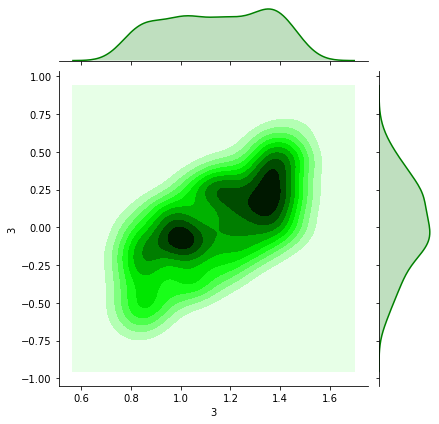

In [270]:
sns.jointplot(y_rf.iloc[:,3],y_rf.iloc[:,3]-y_test.iloc[:,3],kind = 'kde',color='green')

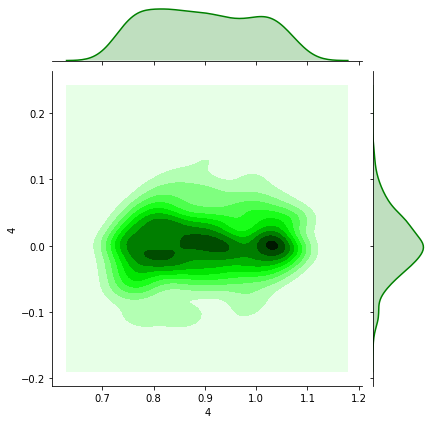

In [271]:
sns.jointplot(y_rf.iloc[:,4],y_rf.iloc[:,4]-y_test.iloc[:,4],kind = 'kde',color='green')

In [70]:
from xgboost import XGBRegressor

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=1000,n_estimators=10000, 
                                                         learning_rate=0.05,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)


/home/ajana/.local/lib/python3.7/site-packages/xgboost/core.py:613: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn("Use subset (sliced data) of np.ndarray is not recommended " +


In [71]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(X_test,y_test)

0    0.001613
1   -0.025637
2    0.260563
3    3.156184
4    0.009730
dtype: float64


0.55418698444311

In [72]:
y_multirf = pd.DataFrame(y_multirf)
y_test = pd.DataFrame(y_test)

In [73]:
pd.concat([y_test,y_multirf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.013520,14.127082,1.055383,0.940761,0.754040,12.986419,14.107795,0.988113,1.217481,0.753211
1,13.095952,13.983772,0.969459,1.334876,0.792393,13.082781,14.000821,0.943203,1.083410,0.794804
2,13.222277,14.101452,0.993820,1.360244,0.841560,13.191367,14.045779,0.890492,1.141193,0.882491
3,13.226813,14.096627,1.041512,1.433316,0.807424,13.206374,14.120229,0.977230,1.107798,0.800090
4,13.058978,14.028864,1.030266,0.784034,1.087080,13.030051,14.032743,0.960691,1.202296,1.073196
...,...,...,...,...,...,...,...,...,...,...
995,12.981509,13.985562,0.782513,1.043570,0.905978,12.986023,14.054594,0.788520,1.088175,0.893279
996,13.147536,14.139523,1.150176,1.209371,0.716316,13.146245,14.037932,1.161860,1.074009,0.751676
997,13.229655,14.150938,0.936853,0.759468,1.093868,13.259607,14.033554,1.001247,1.252564,1.084529
998,13.075002,14.083132,0.994843,0.826535,0.863162,13.095020,14.057947,1.050805,1.124787,0.847516


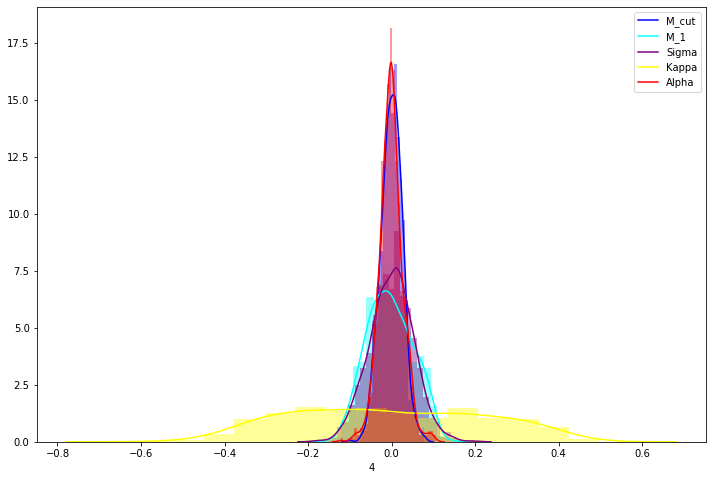

In [74]:
plot_error(y_multirf,y_test)

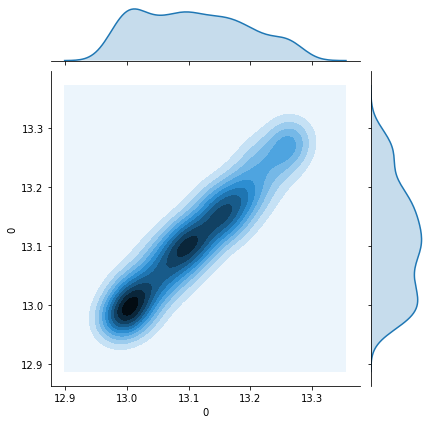

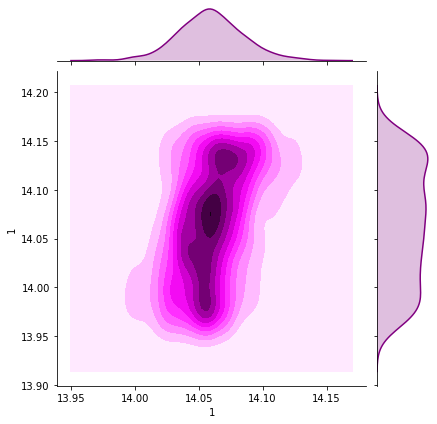

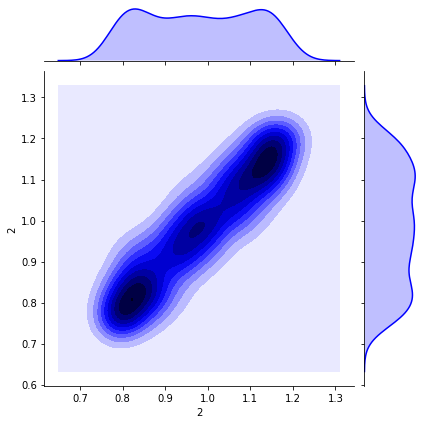

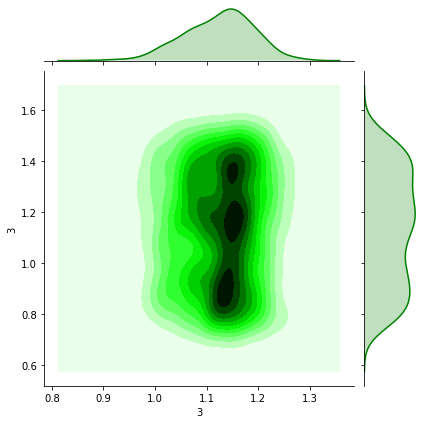

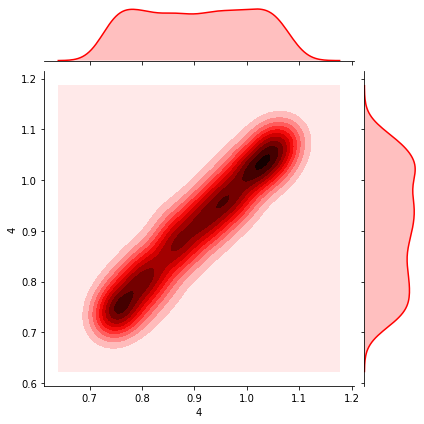

In [75]:
plot_corr(y_multirf,y_test)

In [29]:
from sklearn.svm import SVR

#fit multioutput regressor
multioutputsvcregressor = MultiOutputRegressor(SVR(kernel='rbf', degree=3, gamma='auto',
                                                coef0=1.0, tol=0.001, C=1.0, epsilon=0.1, 
                                                shrinking=False, cache_size=400, verbose=False, 
                                                max_iter=-1))
multioutputsvcregressor.fit(X_train, y_train)
# predicting
y_svc = multioutputsvcregressor.predict(X_test)

In [30]:
print (np.mean((y_svc - y_test)*100/(y_test), axis=0))
multioutputsvcregressor.score(X_test,y_test)

0    0.040738
1   -0.020965
2    0.975790
3    3.883784
4   -0.973837
dtype: float64


0.3664230090937671

In [32]:
y_svc = pd.DataFrame(y_svc)
y_test = pd.DataFrame(y_test)
pd.concat([y_test,y_svc], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.013520,14.127082,1.055383,0.940761,0.754040,13.032130,14.060004,1.060183,1.094814,0.744650
1,13.095952,13.983772,0.969459,1.334876,0.792393,13.104631,14.060004,0.968259,1.124835,0.783743
2,13.222277,14.101452,0.993820,1.360244,0.841560,13.196588,14.060004,0.895118,1.093165,0.886037
3,13.226813,14.096627,1.041512,1.433316,0.807424,13.179886,14.060004,0.913917,1.108854,0.780531
4,13.058978,14.028864,1.030266,0.784034,1.087080,13.068439,14.060004,1.021424,1.159678,1.046311
...,...,...,...,...,...,...,...,...,...,...
995,12.981509,13.985562,0.782513,1.043570,0.905978,13.079355,14.060004,0.997789,1.125175,0.867890
996,13.147536,14.139523,1.150176,1.209371,0.716316,13.073315,14.060004,0.985804,1.125896,0.763376
997,13.229655,14.150938,0.936853,0.759468,1.093868,13.225747,14.060004,0.899534,1.161503,1.046512
998,13.075002,14.083132,0.994843,0.826535,0.863162,13.079408,14.060004,0.989939,1.129900,0.844309


/home/ajana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/home/ajana/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/ajana/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/home/ajana/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/home/ajana/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/home/ajana/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: inval

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

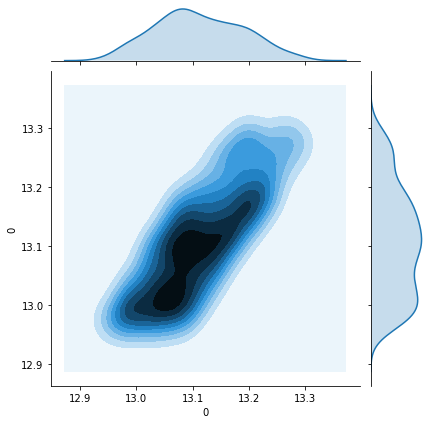

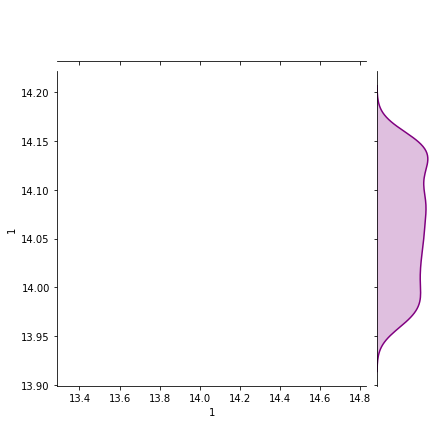

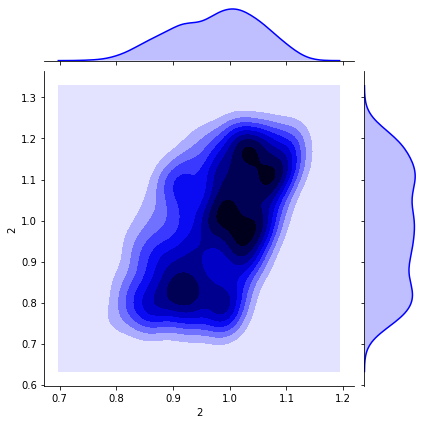

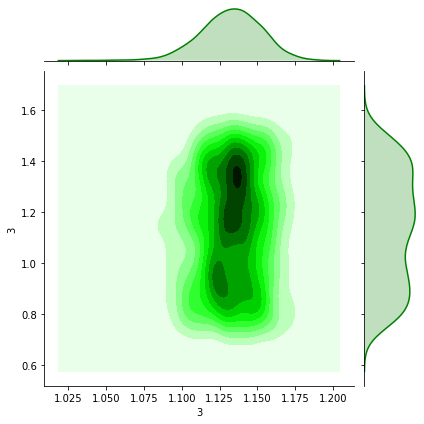

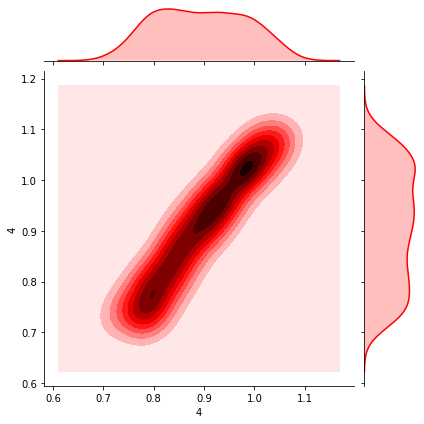

In [33]:
sns.jointplot(y_svc.iloc[:,0],y_test.iloc[:,0],kind = "kde")
sns.jointplot(y_svc.iloc[:,1],y_test.iloc[:,1],kind = 'kde',color='purple')
sns.jointplot(y_svc.iloc[:,2],y_test.iloc[:,2],kind = 'kde',color='blue')
sns.jointplot(y_svc.iloc[:,3],y_test.iloc[:,3],kind = 'kde',color='green')
sns.jointplot(y_svc.iloc[:,4],y_test.iloc[:,4],kind = 'kde',color='red')
plt.tight_layout

In [ ]:
sns.jointplot(y_svc.iloc[:,2],y_svc.iloc[:,3]-y_test.iloc[:,3],kind = 'reg',color='green')

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

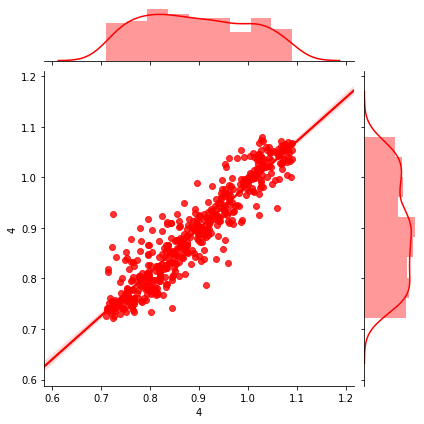